In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole, dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, lf3d, j3d
from mhsflex.vis import plot
from mhsflex.metrics import compare_field3d
from mhsflex.switch import f, dfdz, f_low, dfdz_low

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder = "/Users/lilli/Desktop/Thesis/AsympTheory/"

In [4]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [5]:
a = 0.44
alpha = 0.05
b = 1.0
z0 = 2.0
deltaz = 0.2

In [26]:
a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = 1 / z0
kappa = -np.log(a / a_low) / z0

f_const = np.zeros(nresol_z)
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_const[iz] = a * (1 - np.tanh(-z0 / deltaz))
    f_exp[iz] = f_low(z, a_low, kappa)
    f_tanh[iz] = f(z, z0, deltaz, a, b)

In [6]:
f_tanh02 = np.zeros(nresol_z)
f_tanh1 = np.zeros(nresol_z)
f_tanh2 = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_tanh02[iz] = f(z, z0, 0.2, a, b)
    f_tanh1[iz] = f(z, z0, 1.0, a, b)
    f_tanh2[iz] = f(z, z0, 2.0, a, b)

In [20]:
f_step = np.zeros_like(f_tanh02)
f_step[0:41] = 2*a

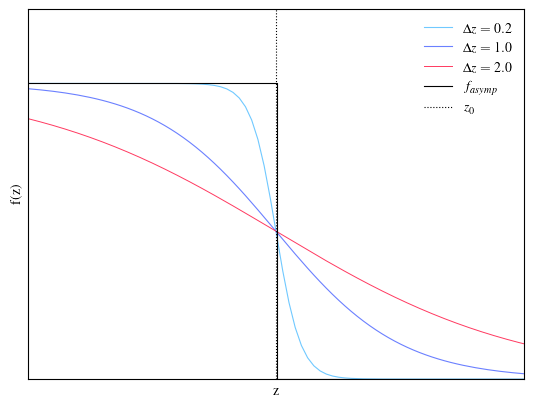

In [23]:
plt.plot(
    z_arr,
    f_tanh02,
    linewidth=0.8,
    color=c1,
    # linestyle="dashed",
    label=r"$\Delta z = 0.2$",
)
plt.plot(
    z_arr,
    f_tanh1,
    linewidth=0.8,
    color=c2,
    # linestyle="solid",
    label=r"$\Delta z = 1.0$",
)
plt.plot(
    z_arr,
    f_tanh2,
    linewidth=0.7,
    color=c4,
    # linestyle="dotted",
    label=r"$\Delta z = 2.0$",
)
plt.step(z_arr, f_step, linewidth=0.8,color=c3, label=r"$f_{asymp}$")
plt.axvline(x=z0, color="black", linestyle="dotted", linewidth=0.8, label=r"$z_0$")
plt.legend(frameon=False)
plt.xlabel(r"z")
plt.ylabel(r"f(z)")
plt.xticks([])
plt.yticks([])
plt.xlim([0, 2 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "heightprofiles2.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

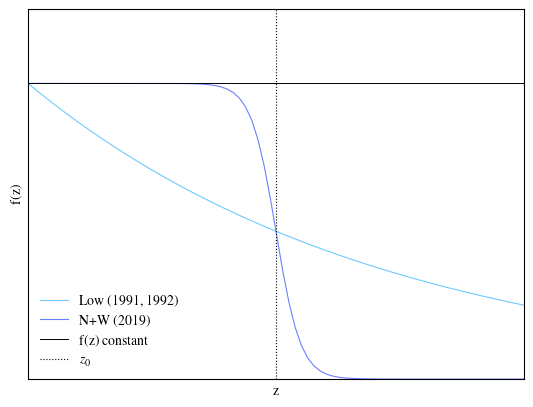

In [27]:
plt.plot(
    z_arr,
    f_exp,
    linewidth=0.8,
    color=c1,
    # linestyle="dashed",
    label=r"Low (1991, 1992)",
)
plt.plot(
    z_arr,
    f_tanh,
    linewidth=0.8,
    color=c2,
    # linestyle="solid",
    label=r"N+W (2019)",
)
plt.plot(
    z_arr,
    f_const,
    linewidth=0.7,
    color=c3,
    # linestyle="dotted",
    label=r"f(z) constant",
)
plt.axvline(x=z0, color="black", linestyle="dotted", linewidth=0.8, label=r"$z_0$")
plt.legend(frameon=False)
plt.xlabel(r"z")
plt.ylabel(r"f(z)")
plt.xticks([])
plt.yticks([])
plt.xlim([0, 2 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "heightprofiles.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

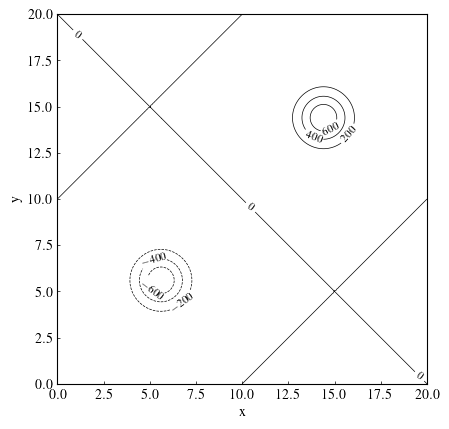

In [28]:
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data2d.bz,
    #levels = np.array((-700, -400, -200, -100, 0, 100, 200, 400, 700)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "contour.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [29]:
data3dNW = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False)

In [63]:
data3dL = calculate_magfield(data2d, a, b, alpha, z0, deltaz, asymptotic=False, tanh=False)

KeyboardInterrupt: 

In [31]:
folderNW = "/Users/lilli/Desktop/Thesis/AsympTheory/NW"
folderL = "/Users/lilli/Desktop/Thesis/AsympTheory/L"

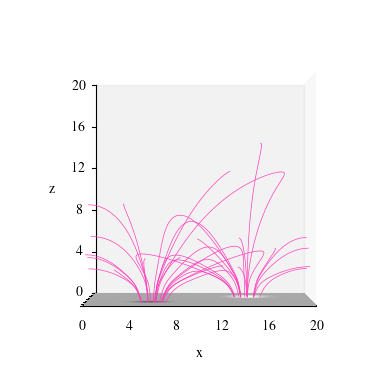

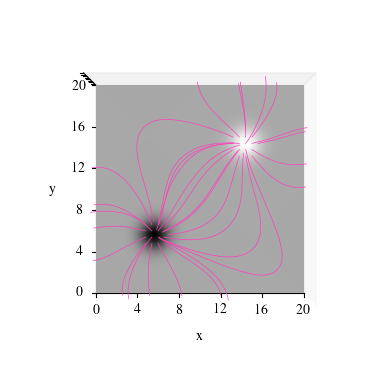

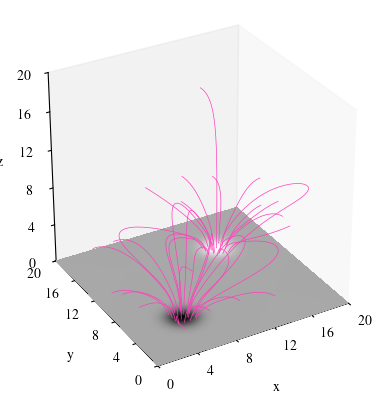

In [32]:
plot(data3dNW, "side", save=True, path=folderNW)
plot(data3dNW, "los", save=True, path=folderNW)
plot(data3dNW, "angular", save=True, path=folderNW)

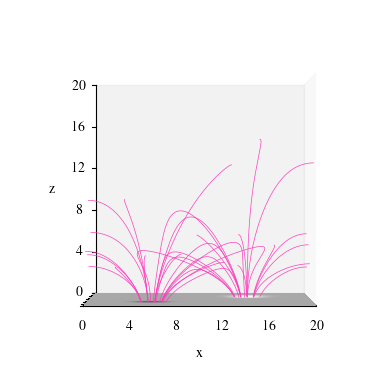

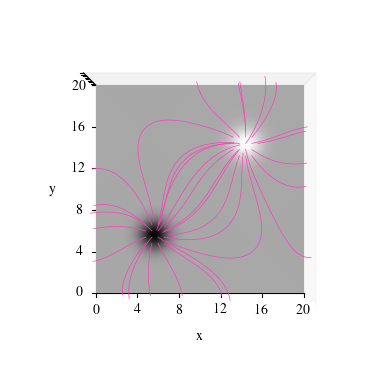

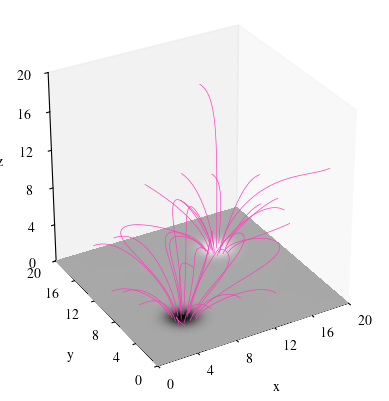

In [33]:
plot(data3dL, "side", save=True, path=folderL)
plot(data3dL, "los", save=True, path=folderL)
plot(data3dL, "angular", save=True, path=folderL)

In [34]:
maxcoord = np.unravel_index(np.argmax(data2d.bz, axis=None), data2d.bz.shape)
iy = int(maxcoord[0])
ix = int(maxcoord[1])

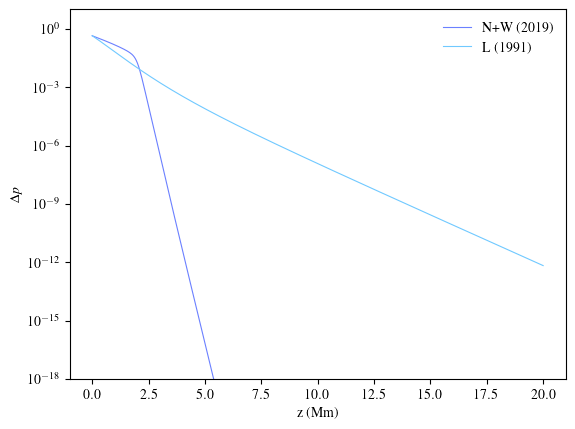

In [45]:
plt.plot(z_arr, abs(data3dNW.dpressure[ix, iy, :]), linewidth=0.8, color=c2, label=r"N+W (2019)")
plt.plot(z_arr, abs(data3dL.dpressure[ix, iy, :]), linewidth=0.8, color=c1, label=r"L (1991)")
# plt.axvline(x=z0, color="black", linestyle="solid", linewidth=0.25)
plt.legend(frameon=False)
plt.xlabel("z (Mm)")
plt.ylabel(r"$\Delta p$")
plt.yscale("log")
plt.ylim([10**-18, 10**1])
plotname = folder + "pres_log.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

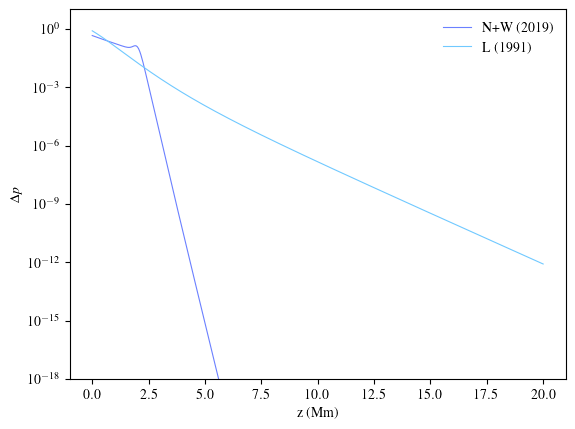

In [46]:
plt.plot(z_arr, abs(data3dNW.ddensity[ix, iy, :]), linewidth=0.8, color=c2, label=r"N+W (2019)")
plt.plot(z_arr, abs(data3dL.ddensity[ix, iy, :]), linewidth=0.8, color=c1, label=r"L (1991)")
# plt.axvline(x=z0, color="black", linestyle="solid", linewidth=0.25)
plt.legend(frameon=False)
plt.xlabel("z (Mm)")
plt.ylabel(r"$\Delta p$")
plt.yscale("log")
plt.ylim([10**-18, 10**1])
plotname = folder + "den_log.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight")
plt.show()

In [47]:
Pressuremap = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFF2B1-E0FF00
        (0.000, c1),
        (1.000, (1.0, 1.0, 1.000)),  # (1.000, 0.812, 0.918)), #(0.937, 1.000, 0.984)),
        # (1.000, (1.000, 0.537, 0.000)),
    ),
)

In [48]:
Densitymap = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#1578FF-EFF6FF
        (0.000, c5),
        (1.000, (1.0, 1.0, 1.000)),
    ),
)

In [49]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 20.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 10.0)
z_z0 = z0

iz_2z0 = int(2 * nresol_z / 10.0)
z_2z0 = 2 * z0

In [50]:
x_plot = np.outer(data3dNW.y, np.ones(data3dNW.nx))
y_plot = np.outer(data3dNW.x, np.ones(data3dNW.ny)).T

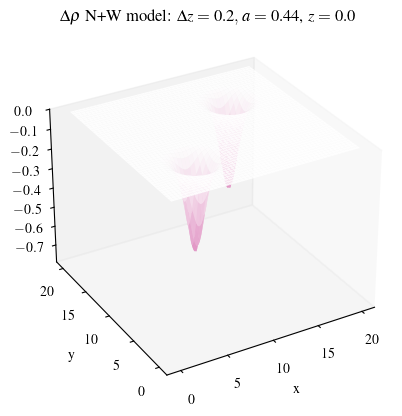

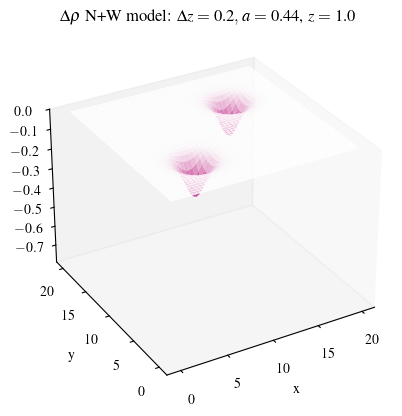

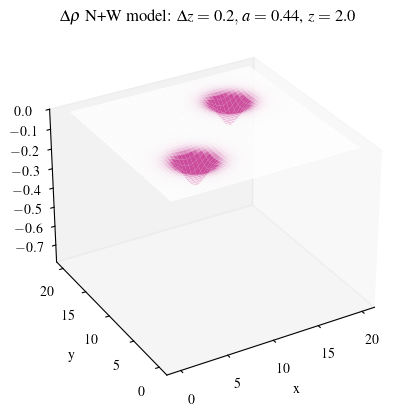

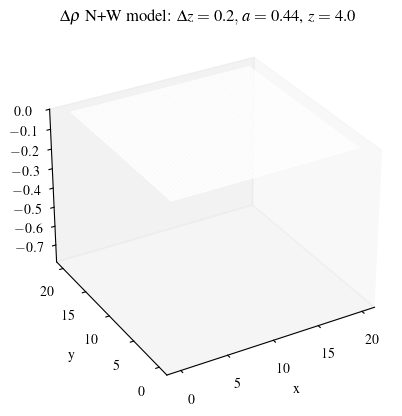

In [60]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.ddensity[:, :, 0],
    cmap=Densitymap,
    vmin=data3dL.ddensity[:, :, 0].min(),
    vmax=data3dL.ddensity[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_photo]))
)
plotname = folder + "/ddsurf_NW_" + str(0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.ddensity[:, :, iz_z0half],
    vmin=data3dL.ddensity[:, :, iz_z0half].min(),
    vmax=data3dL.ddensity[:, :, iz_z0half].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0half]))
)
plotname = folder + "/ddsurf_NW_" + str(iz_z0half) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.ddensity[:, :, iz_z0],
    vmin=data3dL.ddensity[:, :, iz_z0].min(),
    vmax=data3dL.ddensity[:, :, iz_z0].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0]))
)
plotname = folder + "/ddsurf_NW_" + str(iz_z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.ddensity[:, :, iz_2z0],
    vmin=data3dL.ddensity[:, :, iz_2z0].min(),
    vmax=data3dL.ddensity[:, :, iz_2z0].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_2z0]))
)
plotname = folder + "/ddsurf_NW_" + str(iz_2z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

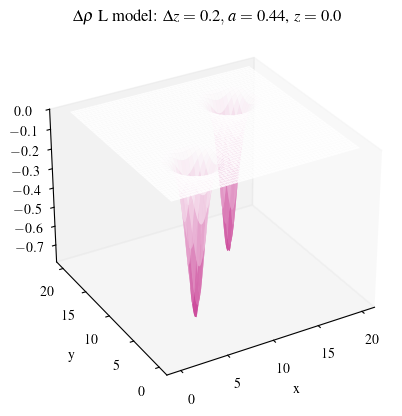

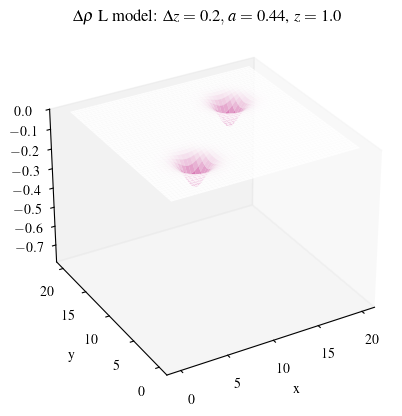

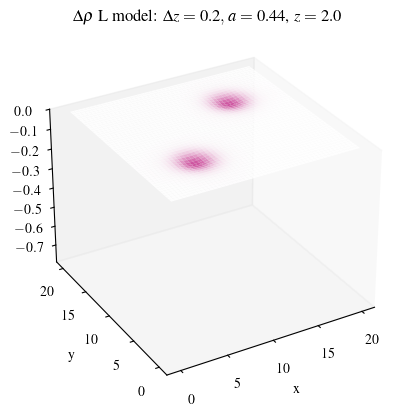

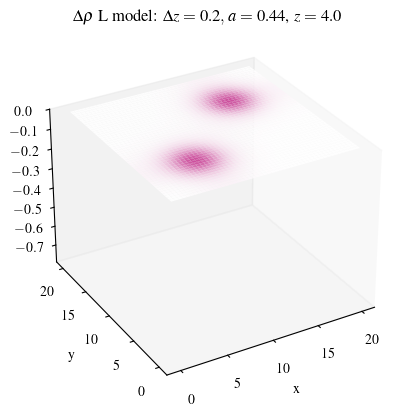

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.ddensity[:, :, 0],
    cmap=Densitymap,
    vmin=data3dL.ddensity[:, :, 0].min(),
    vmax=data3dL.ddensity[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_photo]))
)
plotname = folder + "/ddsurf_L_" + str(0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.ddensity[:, :, iz_z0half],
    vmin=data3dL.ddensity[:, :, iz_z0half].min(),
    vmax=data3dL.ddensity[:, :, iz_z0half].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0half]))
)
plotname = folder + "/ddsurf_L_" + str(iz_z0half) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.ddensity[:, :, iz_z0],
    vmin=data3dL.ddensity[:, :, iz_z0].min(),
    vmax=data3dL.ddensity[:, :, iz_z0].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0]))
)
plotname = folder + "/ddsurf_L_" + str(iz_z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.ddensity[:, :, iz_2z0],
    vmin=data3dL.ddensity[:, :, iz_2z0].min(),
    vmax=data3dL.ddensity[:, :, iz_2z0].max(),
    cmap=Densitymap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.ddensity[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta \rho$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_2z0]))
)
plotname = folder + "/ddsurf_L_" + str(iz_2z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

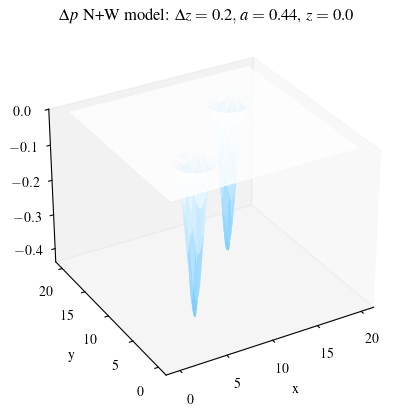

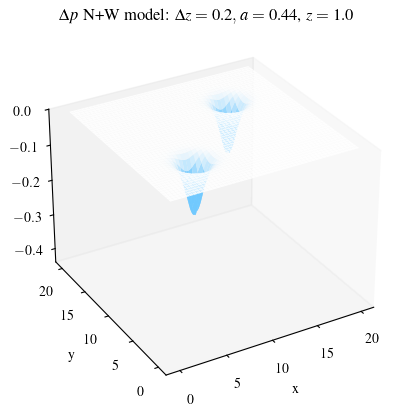

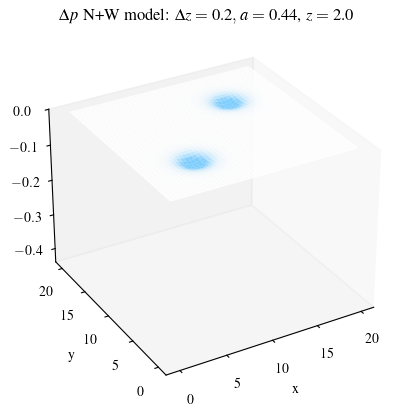

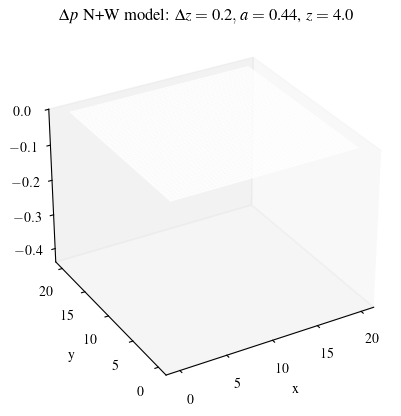

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, 0],
    cmap=Pressuremap,
    vmin=data3dL.dpressure[:, :, 0].min(),
    vmax=data3dL.dpressure[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_photo]))
)
plotname = folder + "/dpsurf_NW_" + str(0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_z0half],
    vmin=data3dL.dpressure[:, :, iz_z0half].min(),
    vmax=data3dL.dpressure[:, :, iz_z0half].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0half]))
)
plotname = folder + "/dpsurf_NW_" + str(iz_z0half) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_z0],
    vmin=data3dL.dpressure[:, :, iz_z0].min(),
    vmax=data3dL.dpressure[:, :, iz_z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0]))
)
plotname = folder + "/dpsurf_NW_" + str(iz_z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_2z0],
    vmin=data3dL.dpressure[:, :, iz_2z0].min(),
    vmax=data3dL.dpressure[:, :, iz_2z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ N+W model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_2z0]))
)
plotname = folder + "/dpsurf_NW_" + str(iz_2z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

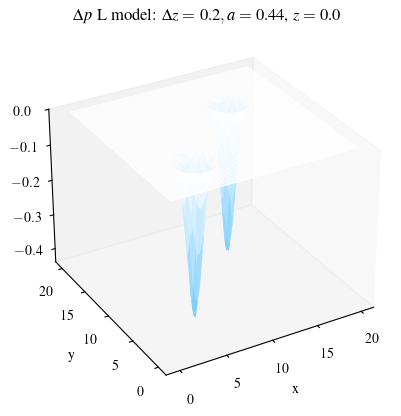

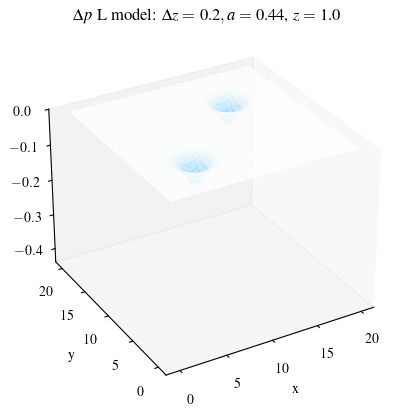

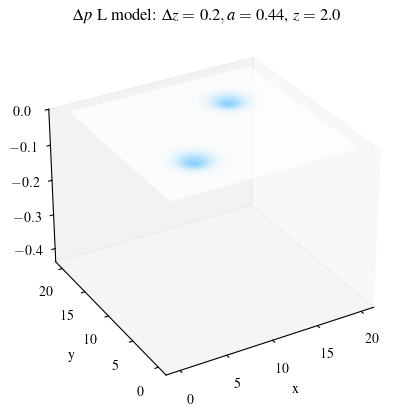

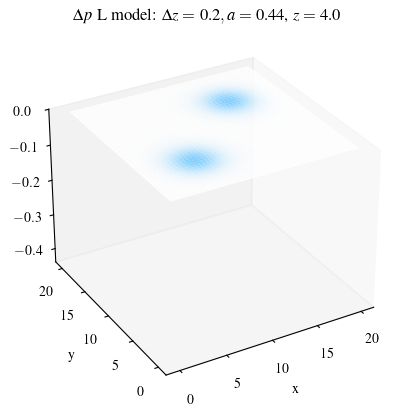

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.dpressure[:, :, 0],
    cmap=Pressuremap,
    vmin=data3dL.dpressure[:, :, 0].min(),
    vmax=data3dL.dpressure[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_photo]))
)
plotname = folder + "/dpsurf_L_" + str(0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.dpressure[:, :, iz_z0half],
    vmin=data3dL.dpressure[:, :, iz_z0half].min(),
    vmax=data3dL.dpressure[:, :, iz_z0half].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0half]))
)
plotname = folder + "/dpsurf_L_" + str(iz_z0half) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.dpressure[:, :, iz_z0],
    vmin=data3dL.dpressure[:, :, iz_z0].min(),
    vmax=data3dL.dpressure[:, :, iz_z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_z0]))
)
plotname = folder + "/dpsurf_L_" + str(iz_z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dL.dpressure[:, :, iz_2z0],
    vmin=data3dL.dpressure[:, :, iz_2z0].min(),
    vmax=data3dL.dpressure[:, :, iz_2z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dL.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
    r"$\Delta p$ L model: $\Delta z =$ "
    + str(deltaz)
    + r"$, a =$ "
    + str(a)
    + r", $z = $ "
    + str(np.floor(z_arr[iz_2z0]))
)
plotname = folder + "/dpsurf_L_" + str(iz_2z0) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

In [75]:
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix] / 10.0
        y = y_arr[iy] / 10.0
        data_bz[iy, ix] = dalmatian(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

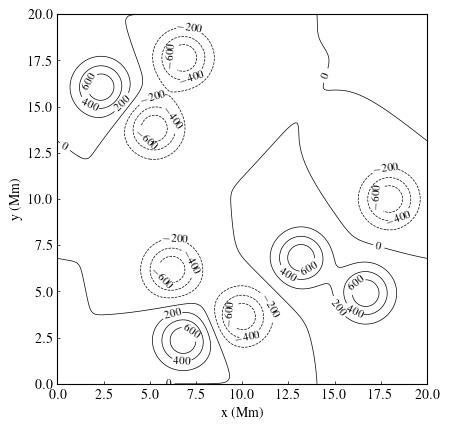

In [76]:
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data2d.bz,
    #levels = np.array((-700, -400, -200, -100, 0, 100, 200, 400, 700)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "multipole_contour.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [77]:
from mhsflex.b3d import mirror

data_bz_see = mirror(data_bz)

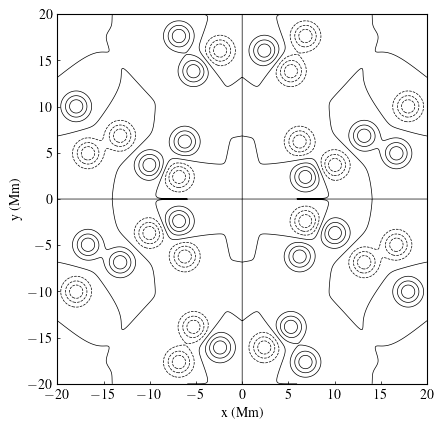

In [78]:
x_arr = np.arange(2 * nresol_x) * (2 * xmax) / (2 * nresol_x - 1) - xmax
y_arr = np.arange(2 * nresol_y) * (2 * ymax) / (2 * nresol_y - 1) - ymax

x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data_bz_see,
    #levels = np.array((-700, -400, -200, -100, 0, 100, 200, 400, 700)),
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x (Mm)")
ax.set_ylabel("y (Mm)")
#ax.clabel(CS, fontsize=8, inline=True)
ax.set_box_aspect(1)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "multipole_contour_seehafer.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [79]:
a = 0.48
alpha = 0.03
b = 1.0

a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = 1 / z0

nf_max = 200

length_scale = 1.0
length_scale_x = 1.0 * nresol_x * float(pixelsize_x)
length_scale_y = 1.0 * nresol_y * float(pixelsize_y)
length_scale_x_norm = length_scale_x / length_scale
length_scale_y_norm = length_scale_y / length_scale

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]
ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]

one_arr = 0.0 * np.arange(nf_max) + 1.0
ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]
k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

ratiodzls = deltaz / length_scale
p_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a - a * b) - alpha**2)
q_arr = 0.5 * ratiodzls * np.sqrt(k2_arr * (1.0 - a + a * b) - alpha**2)

print(p_arr[20, 20])
print(q_arr[20, 20])

p_arr_low = 2.0 / kappa * np.sqrt(k2_arr - alpha**2)
q_arr_low = 2.0 / kappa * np.sqrt(k2_arr * a_low)

print(p_arr_low[20, 20])
print(q_arr_low[20, 20])

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

phi_hyper_test = 0.0 * z_arr
phi_asymp_test = 0.0 * z_arr
phi_exp_test = 0.0 * z_arr
dphidz_hyper_test = 0.0 * z_arr
dphidz_asymp_test = 0.0 * z_arr
dphidz_exp_test = 0.0 * z_arr

p = 0.08880700153068728
q = 0.44427816514182555
p_low = 17.77112660567302
q_low = 17.412473878703597

for iz in range(nresol_z):
    z = z_arr[iz]
    phi_hyper_test[iz] = phi_hypgeo(z, p, q, z0, deltaz)
    phi_asymp_test[iz] = phi(z, p, q, z0, deltaz)
    phi_exp_test[iz] = phi_low(z, p_low, q_low, kappa)

    dphidz_hyper_test[iz] = dphidz_hypgeo(z, p, q, z0, deltaz)
    dphidz_asymp_test[iz] = dphidz(z, p, q, z0, deltaz)
    dphidz_exp_test[iz] = dphidz_low(z, p_low, q_low, kappa)


0.08880700153068728
0.4442781651418255
17.771126605673018
17.412473878703597


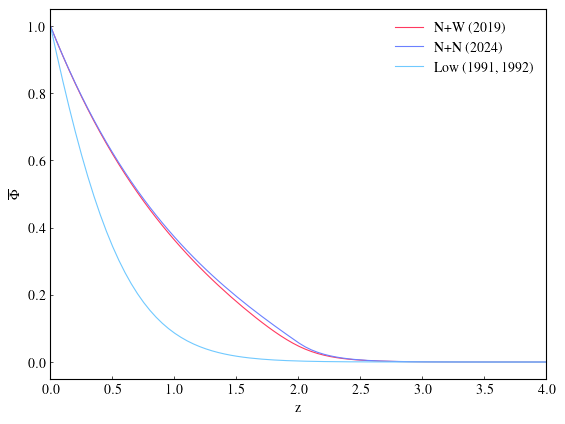

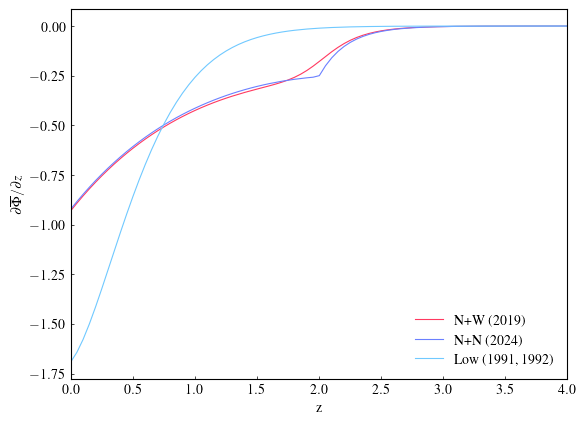

In [86]:
plt.plot(z_arr, phi_hyper_test, linewidth=0.8, color=c4, label="N+W (2019)")
plt.plot(z_arr, phi_asymp_test, linewidth=0.8, color=c2, label="N+N (2024)")
plt.plot(z_arr, phi_exp_test, linewidth=0.8, color=c1, label="Low (1991, 1992)")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.xlabel("z")
plt.ylabel(r"$\overline{\Phi}$")
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/phi.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()


plt.plot(z_arr, dphidz_hyper_test, linewidth=0.8, color=c4, label="N+W (2019)")
plt.plot(z_arr, dphidz_asymp_test, linewidth=0.8, color=c2, label="N+N (2024)")
plt.plot(
    z_arr,
    dphidz_exp_test,
    linewidth=0.8,
    color=c1,
    label="Low (1991, 1992)",
)
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.xlabel("z")
plt.ylabel(r"$\partial \overline{\Phi} / \partial z$")
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/dphidz.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [82]:
phi_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
phi_asymp = np.zeros((nresol_y, nresol_x, nresol_z))
phi_exp = np.zeros((nresol_y, nresol_x, nresol_z))

dphidz_exp = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_hyper = np.zeros((nresol_y, nresol_x, nresol_z))
dphidz_asymp = np.zeros((nresol_y, nresol_x, nresol_z))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        p = p_arr[iy, ix]
        q = q_arr[iy, ix]
        p_low = p_arr_low[iy, ix]
        q_low = q_arr_low[iy, ix]
        for iz in range(nresol_z):
            z = z_arr[iz]
            phi_hyper[iy, ix, iz] = phi_hypgeo(z, p, q, z0, deltaz)
            phi_asymp[iy, ix, iz] = phi(z, p, q, z0, deltaz)
            phi_exp[iy, ix, iz] = phi_low(z, p_low, q_low, kappa)

            dphidz_hyper[iy, ix, iz] = dphidz_hypgeo(z, p, q, z0, deltaz)
            dphidz_asymp[iy, ix, iz] = dphidz(z, p, q, z0, deltaz)
            dphidz_exp[iy, ix, iz] = dphidz_low(z, p_low, q_low, kappa)

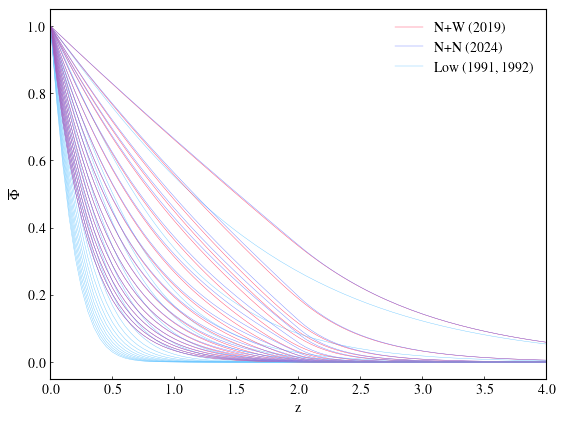

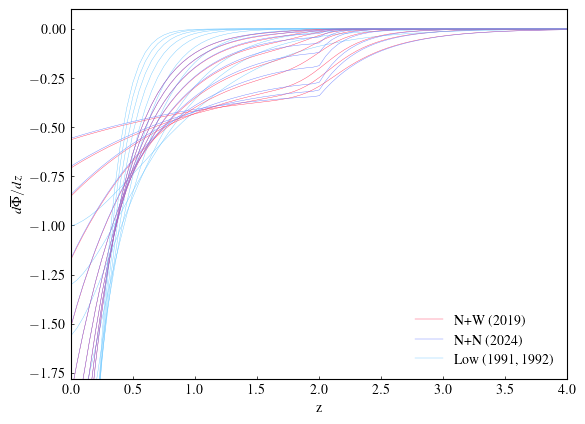

In [85]:
plt.plot(z_arr, phi_hyper[0, 0, :], linewidth=0.3, color=c4, label="N+W (2019)")
plt.plot(
    z_arr,
    phi_asymp[0, 0, :],
    linewidth=0.3,
    color=c2,
    label="N+N (2024)",
)
plt.plot(
    z_arr,
    phi_exp[0, 0, :],
    linewidth=0.3,
    color=c1,
    label="Low (1991, 1992)",
)
for ix in range(4, 80, 4):
    plt.plot(
        z_arr,
        phi_hyper[ix, ix, :],
        linewidth=0.3,
        color=c4,
        # label="N+W (2019)"
    )
    plt.plot(
        z_arr,
        phi_asymp[ix, ix, :],
        linewidth=0.3,
        color=c2,
        # label="N+N (2024)",
    )
    plt.plot(
        z_arr,
        phi_exp[ix, ix, :],
        linewidth=0.3,
        color=c1,
        # label="Low (1991, 1992)",
    )
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.xlabel("z")
plt.tick_params(direction="in", length=2, width=0.5)
plt.ylabel(r"$\overline{\Phi}$")
plotname = folder + "/phi_faecher.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()


plt.plot(
    z_arr,
    dphidz_hyper[0, 0, :],
    linewidth=0.3,
    color=c4,
    label="N+W (2019)",
)
plt.plot(
    z_arr,
    dphidz_asymp[0, 0, :],
    linewidth=0.3,
    color=c2,
    label="N+N (2024)",
)
plt.plot(
    z_arr,
    dphidz_exp[0, 0, :],
    linewidth=0.3,
    color=c1,
    label="Low (1991, 1992)",
)
for ix in range(10, 80, 8):
    plt.plot(
        z_arr,
        dphidz_hyper[ix, ix, :],
        linewidth=0.3,
        color=c4,
        # label="N+W (2019)",
    )
    plt.plot(
        z_arr,
        dphidz_asymp[ix, ix, :],
        linewidth=0.3,
        color=c2,
        # label="N+N (2024)",
    )
    plt.plot(
        z_arr,
        dphidz_exp[ix, ix, :],
        linewidth=0.3,
        color=c1,
        # label="Low (1991, 1992)",
    )
plt.ylim([-1.78, .1])
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.xlabel("z")
plt.ylabel(r"$d \overline{\Phi} / dz$")
plotname = folder + "/dphidz_faecher.png"
plt.tick_params(direction="in", length=2, width=0.5)
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()